### Import Libraries & set variables

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [2]:
bins = 25
vmin = 0
vmax = 1
ticks = np.linspace(vmin, vmax, num=bins)
seed = 35
number_of_nodes = 100

title_font = {'fontname': 'Arial', 
            'size': 25, 
            'color': 'black', 
            'weight': 'normal',
            'verticalalignment': 'bottom'
            }

title_loc = 'center'
x_y_label_font = {'size': 20}

histogram_title = 'Degree Centrality Histogram of a '
histogram_xlabel = 'Degree Centrality'
histogram_ylabel = 'Count'

prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_edges = list(range(1, 20))


### Functions for creating animations

In [3]:
def update_fig_graph(i, ax, iteration, update_func):
    ax.clear()
    update_func(iteration[i],ax)


def create_and_save_animation(graph='erdos_renyi',plot_type='histogram'):

    fig, ax = plt.subplots(figsize=(15,10))
    plt.close()

    gif_file_path = graph+ '_' + plot_type + r'.gif'

    if graph == 'erdos_renyi':
        print('Creating animation for Erdos-Renyi Graph')
        iteration = prob
        if plot_type == 'histogram':
            print('histogram')
            update_func = plot_histogram_erdos_renyi
        else:
            print('animation for networkx')
            update_func = plot_graph_erdos_renyi

    elif graph == 'barabasi_albert':
        print('Creating animation for Barabasi-Albert Graph')
        iteration = num_edges
        if plot_type == 'histogram':
            print('histogram')
            update_func = plot_histogram_barabasi_albert
        else:
            print('animation for networkx')
            update_func = plot_graph_barabasi_albert
        
    
    ani_graph =animation.FuncAnimation(fig, 
                                update_fig_graph, 
                                frames=len(iteration),
                                fargs=(ax,iteration, update_func),
                                )

    writergif = animation.PillowWriter(fps=1) 
    ani_graph.save(gif_file_path, writer=writergif)

    return gif_file_path

def display_animation(gif_file_path):
    from IPython.display import Image
    display(Image(data=open(gif_file_path,'rb').read(), format='png'))



### Erdos Renyi Random Graph aka Binomial graph:

1. Defination: 

    - Variant 1: Graph such that, given 'n' nodes, the probablity that the edge ('i', 'j') exists is 'p'. It aka binomial graph 
    - Variant 2: Graph such that, given 'n' nodes, is connected with randomly placed 'L' number of links.

    - Note: Only variant 1 is implemented in networkx yet.

        

2. Properties:
    - This graph serves as baselines for real world network comparision

    - The degree distribution of the graph follows a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution),the probablity that node 'i' has 'k' edges is given by:

    $$ P(degree = k) = \binom{n}{k} p^k (1 - p)^ {(n-k)}$$ 

    - As the number of probablity 'p' increase, the average degree centrality tends to (or more likely to) increase. This can be seen by comparision of degree centrality at p = 0.3 and p = 0.6 below. The animation shows how the degree centrality changes as p increases.








#### Functions for Erdos Renyi graph

In [4]:
### Plotting the graph
def plot_graph_erdos_renyi(p, ax, number_of_nodes=number_of_nodes, seed=seed):

    graph = nx.erdos_renyi_graph(
        number_of_nodes, p=p, seed=seed, directed=False)
    degree_centrality = nx.degree_centrality(graph)

    number_of_edges = graph.number_of_edges()

    # total_number_of_edges_possible = (number_of_nodes * (number_of_nodes - 1))/2
    # prob_of_edges = scipy.stats.binom.pmf(number_of_edges, total_number_of_edges_possible, p)
    # print('Probability of {} edges: {}'.format(number_of_edges, prob_of_edges))

    positon = nx.random_layout(graph, seed=seed)
    graph_type = 'Erdos Renyi'
    additional_info = f', p = {p}'

    values_plot = degree_centrality.values()
    ax.set_title(graph_type + additional_info,
                 fontdict=title_font, loc=title_loc)
    
    ax.text(0.5, -0.1, 'Number of Edges (K): ' + 
            str(number_of_edges) )

    nx.draw(graph,
            ax=ax,
            pos=positon,
            node_size=[int(v*1000) for v in values_plot],
            node_color=list(values_plot),
            edge_color='black',
            alpha=0.7,
            cmap=plt.cm.YlGnBu,

            )


In [5]:
### Plotting the histogram
def plot_histogram_erdos_renyi(p, ax, number_of_nodes=number_of_nodes, ticks=ticks, bins=bins):

    graph_type = 'erdos_renyi'
    additional_info = f', p = {p}'

    graph = nx.erdos_renyi_graph(
        number_of_nodes, p=p, seed=seed, directed=False)
    degree_centrality = nx.degree_centrality(graph)

    ax.hist(degree_centrality.values(), bins=bins)

    ax.set_xticks(ticks=ticks)  # set the x axis ticks
    ax.set_title(histogram_title + graph_type + additional_info,
                 fontdict=title_font, loc=title_loc)
    ax.set_xlabel(histogram_xlabel, fontdict=x_y_label_font)
    ax.set_ylabel(histogram_ylabel, fontdict=x_y_label_font)


#### Erdos Renyi graph at p = 0.3

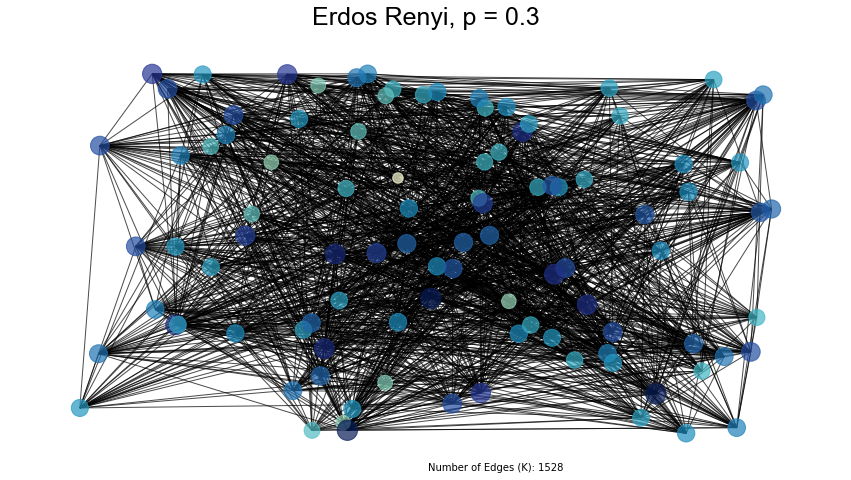

In [6]:
p =0.3

fig, ax = plt.subplots(figsize=(15, 8))
plot_graph_erdos_renyi(p, ax)


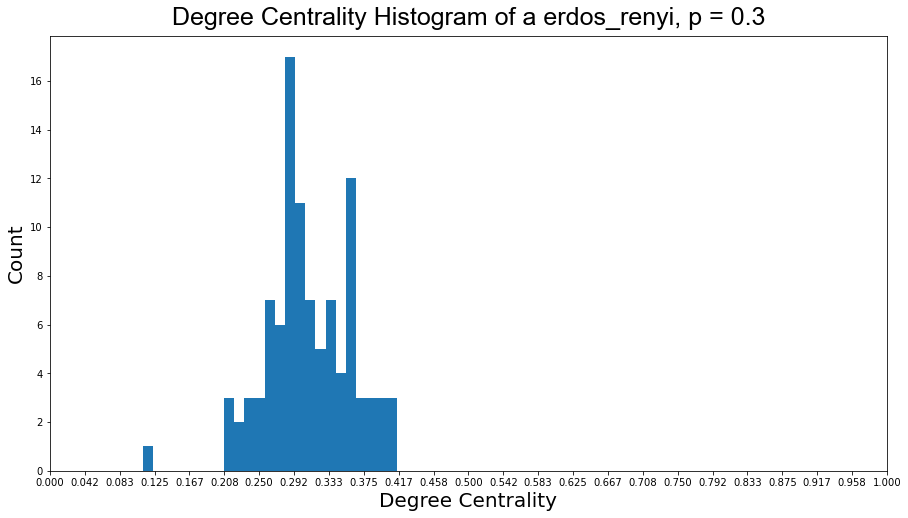

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_histogram_erdos_renyi(p, ax)
plt.show()


#### Erdos Renyi graph at p = 0.6

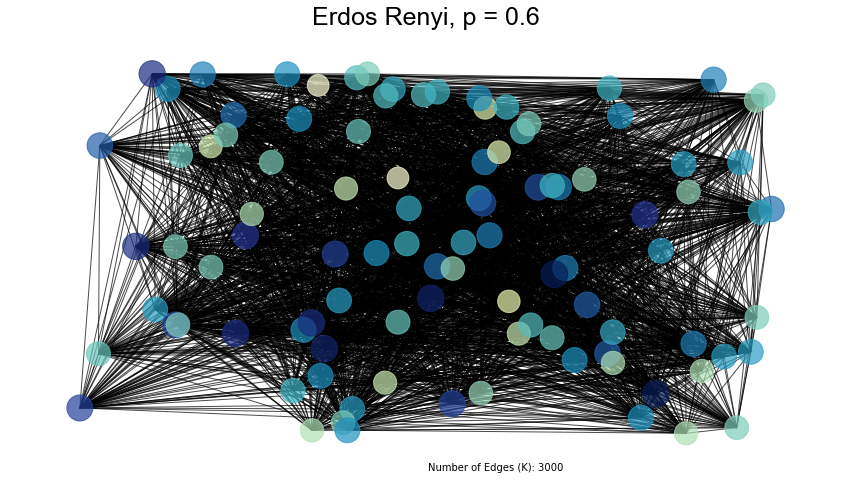

In [8]:
p = 0.6

fig, ax = plt.subplots(figsize=(15, 8))
plot_graph_erdos_renyi(p, ax)


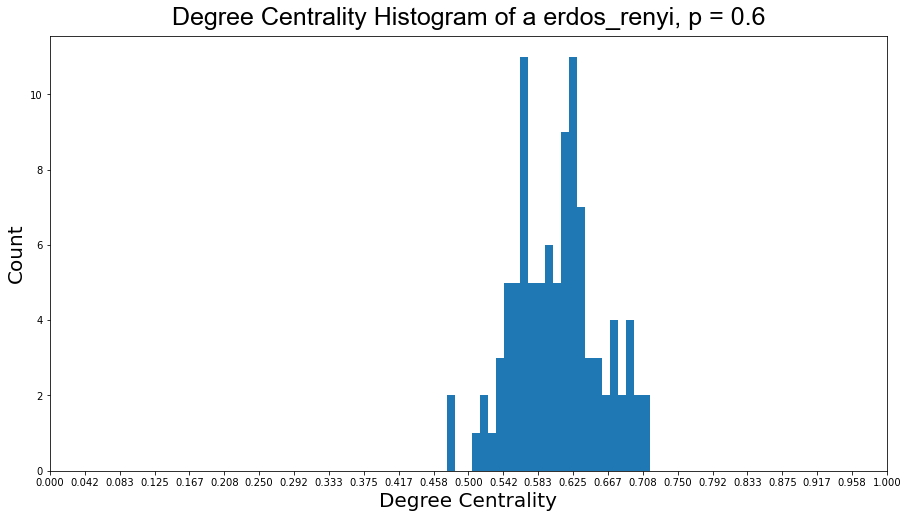

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_histogram_erdos_renyi(p, ax)
plt.show()


#### Change in the degree distribution as the p changes

Creating animation for Erdos-Renyi Graph
animation for networkx


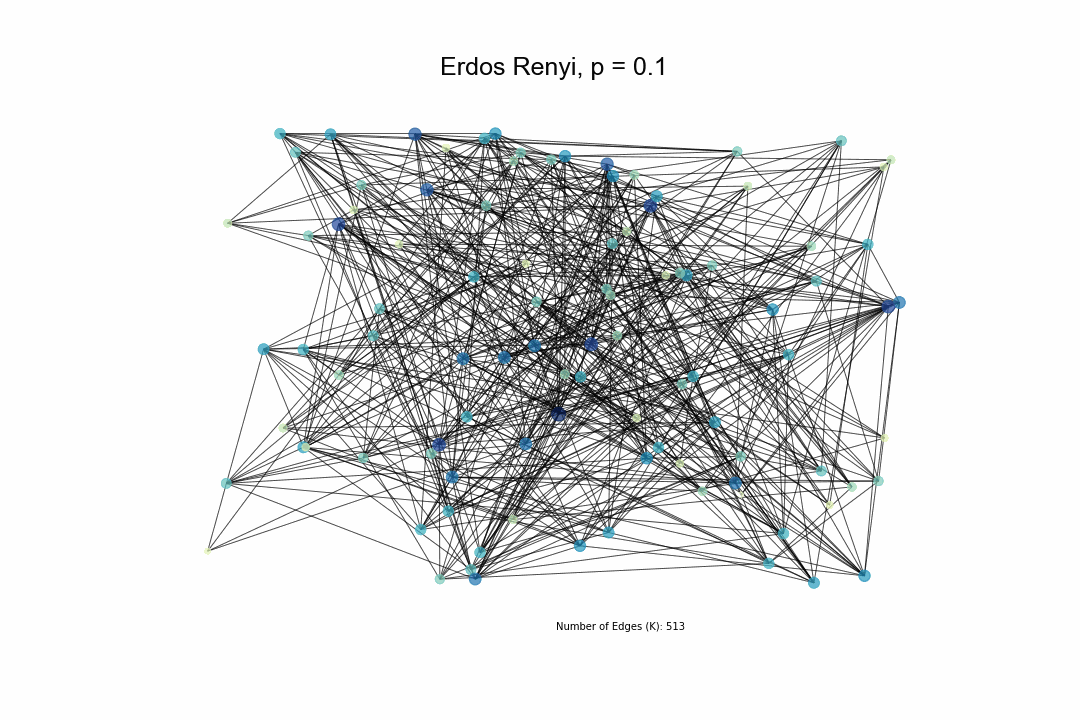

erdos_renyi_networkx_graph.gif


In [10]:
erdos_renyi_graph_path = create_and_save_animation(
    graph='erdos_renyi', plot_type='networkx_graph')

display_animation(erdos_renyi_graph_path)
print(erdos_renyi_graph_path)


Creating animation for Erdos-Renyi Graph
histogram


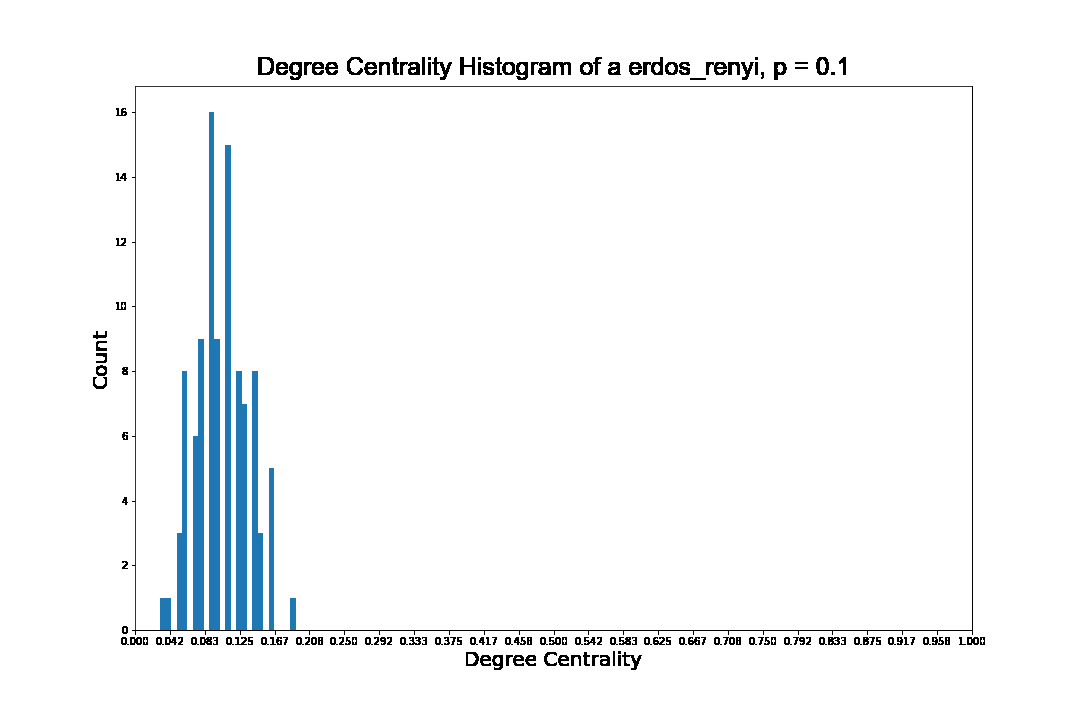

Erdos Renyi Histogram saved to:  erdos_renyi_histogram.gif


In [11]:
erdos_renyi_histogram_path = create_and_save_animation(
    graph='erdos_renyi', plot_type='histogram')
display_animation(erdos_renyi_histogram_path)
print('Erdos Renyi Histogram saved to: ', erdos_renyi_histogram_path)


### Barabasi Albert Graph

- Power law distribution: $$ p^k∼k ^{−γ} $$
    - γ: degree exponent
- The networks that follow above law are known as scale free networks. Real life networks tend to follow the power law.
    i.e rich getting richer phenomena

- Defination:
    The Barbasi Albert starts with m0 nodes. And as the nodes are added to the network, they tend to attach to the node that has higher degree.
- The Barabasi Albert is a scale free network that serves as a better baseline for the real life network empirically for a lot of use cases.
    
- Examples of real world scale free networks:
    1. world wide web link clicks
    2. Approximation of number of friends a person has



#### Functions for Barabasi Albert graph

In [12]:

def plot_graph_barabasi_albert(m, ax, number_of_nodes=number_of_nodes, seed=seed):

        graph = nx.barabasi_albert_graph(number_of_nodes, m, seed=seed, initial_graph=None)
        degree_centrality = nx.degree_centrality(graph)
        number_of_edges = graph.number_of_edges()


        positon = nx.random_layout(graph, seed=seed)
        graph_type = 'Barbasi Albert'
        additional_info = f', m = {m}'

        ax.set_title(graph_type + additional_info, fontdict=title_font, loc=title_loc)
        ax.text(0.5, -0.1, 'Number of Edges (K): ' +
                str(number_of_edges))


        nx.draw(graph, 
                pos=positon,
                node_color=list(degree_centrality.values()), 
                cmap=plt.cm.YlOrBr,
                vmin=0,
                vmax=1,
                node_size= [int(v*1000) for v in degree_centrality.values()],
                alpha = 0.8,
                ax=ax
                )
        return ax
        



In [13]:
def plot_histogram_barabasi_albert(m, ax, number_of_nodes=number_of_nodes, ticks=ticks, bins=bins):

    graph_type='barabasi_albert'
    additional_info = f', m = {m}'


    graph = nx.barabasi_albert_graph(number_of_nodes, m=m, seed=seed)

    degree_centrality = nx.degree_centrality(graph)

    ax.hist(degree_centrality.values(), bins=bins)

    

    ax.set_xticks(ticks=ticks)  # set the x axis ticks
    ax.set_title(histogram_title + graph_type + additional_info, fontdict=title_font, loc=title_loc)
    ax.set_xlabel(histogram_xlabel, fontdict=x_y_label_font)
    ax.set_ylabel(histogram_ylabel,fontdict=x_y_label_font)


#### Barabasi Albert graph at m = 3 

<AxesSubplot:title={'center':'Barbasi Albert, m = 3'}>

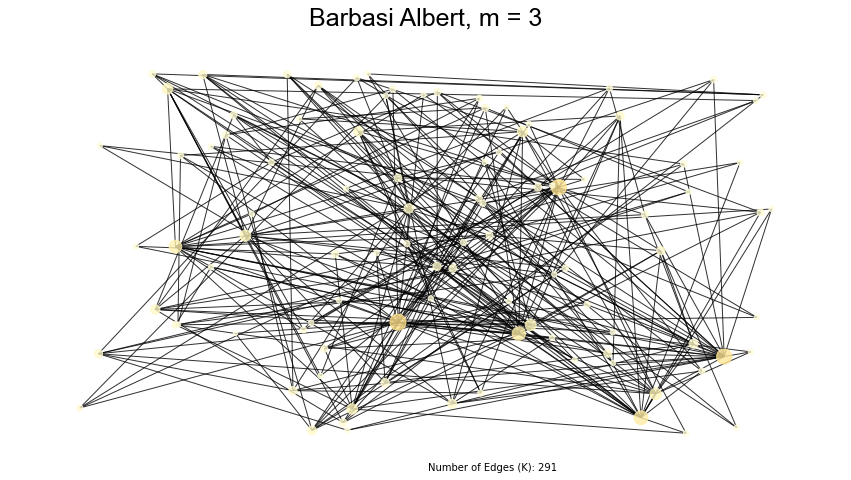

In [14]:
m = 3

fig, ax = plt.subplots(figsize=(15, 8))


plot_graph_barabasi_albert(m, ax)


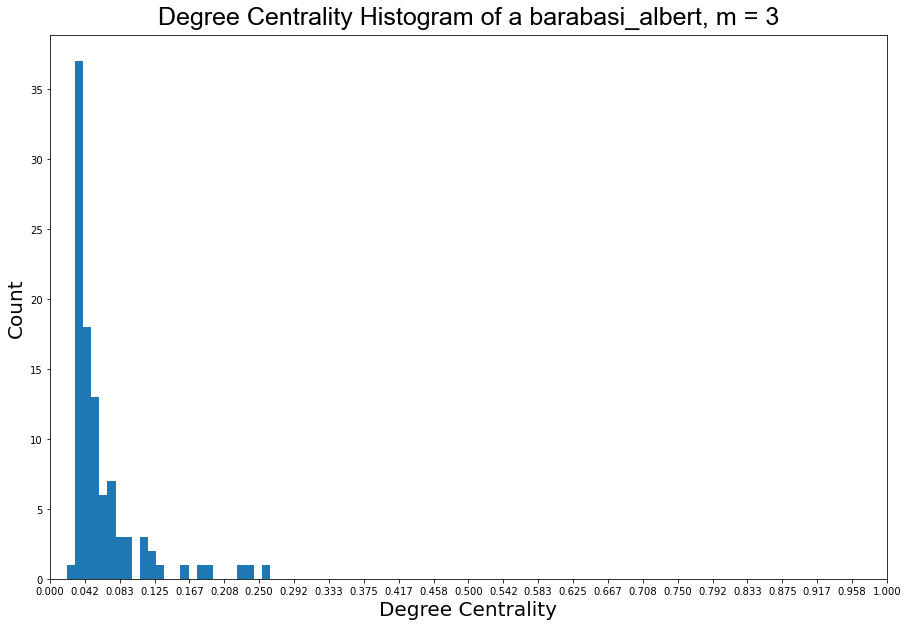

In [15]:
fig, ax = plt.subplots(figsize=(15,10))

plot_histogram_barabasi_albert(m=m, ax=ax)

#### Change in the degree distribution as the m changes

Creating animation for Barabasi-Albert Graph
animation for networkx


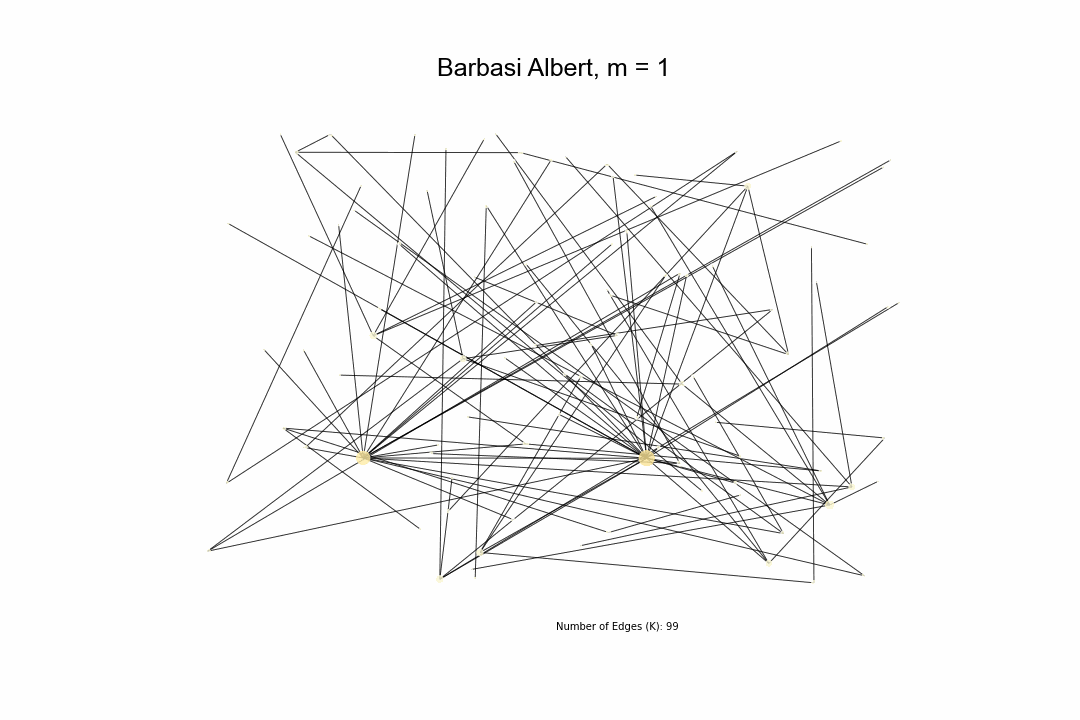

barabasi_albert_networkx_graph.gif


In [16]:
barabasi_albert_graph_path = create_and_save_animation(
    graph='barabasi_albert', plot_type='networkx_graph')

display_animation(barabasi_albert_graph_path)


print(barabasi_albert_graph_path)


Creating animation for Barabasi-Albert Graph
histogram


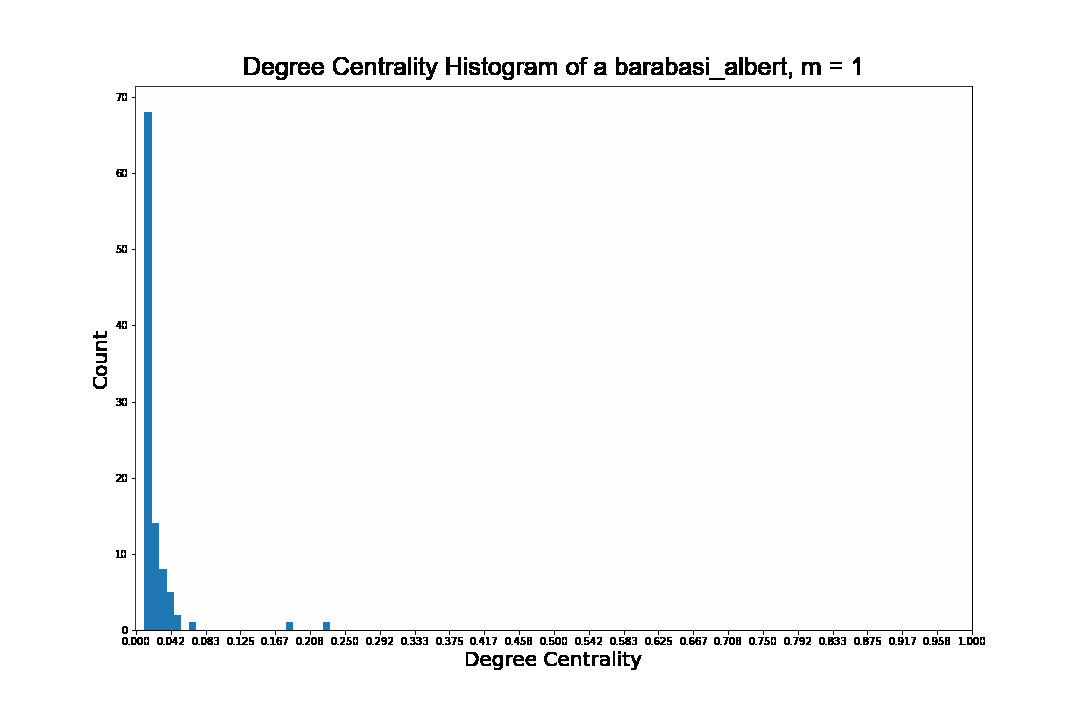

barabasi albert saved to:  barabasi_albert_histogram.gif


In [17]:
barabasi_albert_histogram_path = create_and_save_animation(
    graph='barabasi_albert', plot_type='histogram')
display_animation(barabasi_albert_histogram_path)
print('barabasi albert saved to: ', barabasi_albert_histogram_path)
